In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [7]:
Climatology = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM Climate Normals 1981-2010.xlsx')
Climatology.head(15)

,Month,Daily Average Temperature,Daily Maximum Temperature,Daily Minimum Temperature,Extreme Maximum Temperature,Year of Maximum,Extreme Minimum Temperature,Year of Minimum,Extreme Wind Chill,Year of Extreme Wind Chill,...,Precipitation,Extreme Daily Precipitation,Average Monthly Wind Speed,Most Frequent Direction,Maximum Hourly Speed,Year of Maximum Speed,Maximum Gust Speed,Year of Maximum Gust,High Average vs 2024,Low Average vs 2024
0,January,-5.5,-1.7,-9.3,16.7,2005/13,-30.0,2004/16,-43.0,1994/19,...,64.0,44.6,19.5,SW,89,1978/26,133,1978/26,1.7,4.2
1,February,-4.6,-0.5,-8.6,15.8,1997/21,-26.7,1994-10-01 00:00:00,-37.0,1976-02-01 00:00:00,...,57.8,54.1,18.6,W,85,1997/27,122,1997/27,5.1,4.1
2,March,-0.1,4.3,-4.5,25.0,1998/31,-24.6,2003-03-01 00:00:00,-30.7,1989-07-01 00:00:00,...,68.4,42.8,18.5,W,78,1998/28,126,1973/15,3.9,3.6
3,April,6.7,11.8,1.5,29.7,1990/25,-12.8,1972-07-01 00:00:00,-22.5,1972-07-01 00:00:00,...,79.1,45.2,18.6,NE,89,1979-06-01 00:00:00,119,1979-06-01 00:00:00,1.2,1.9
4,May,12.8,18.5,7.1,33.1,2006/29,-3.9,1966-10-01 00:00:00,-8.0,1978-01-01 00:00:00,...,79.4,39.9,15.9,NE,74,2003-11-01 00:00:00,105,1973/16,3.0,2.7
5,June,18.3,23.9,12.6,35.0,1988/25,1.1,1998-06-01 00:00:00,0.0,1970-01-01 00:00:00,...,84.9,66.6,14.0,SW,74,1992/17,102,1992/17,1.0,1.1
6,July,20.9,26.5,15.2,37.4,1988-07-01 00:00:00,5.6,1961-05-01 00:00:00,0.0,1970-01-01 00:00:00,...,100.7,107.0,12.6,W,56,1977/31,106,1989/26,NaN,NaN
7,August,20.0,25.3,14.5,36.4,2001-08-01 00:00:00,1.1,1965/30,0.0,1970-01-01 00:00:00,...,79.2,90.8,11.8,SW,50,1983-11-01 00:00:00,96,1990/27,NaN,NaN
8,September,15.8,21.2,10.4,34.4,1973-03-01 00:00:00,-2.2,1974/23,-4.6,1974/23,...,81.9,59.4,13.1,SW,52,2000/21,93,2002/14,NaN,NaN
9,October,9.3,14.1,4.5,30.3,2007-08-01 00:00:00,-7.8,1965/29,-10.9,1976/27,...,77.4,91.0,15.6,SW,67,1990/18,96,1983/13,NaN,NaN


In [8]:
rainfall_total = Climatology['Rainfall'].sum().round(2)
print(f"Rainfall Sum: {rainfall_total} mm")

snowfall_total = Climatology['Snowfall'].sum().round(2)
print(f"Snowfall Sum: {snowfall_total} cm")

precipitation_total = Climatology['Precipitation'].sum().round(2)
print(f"Precipitation Total: {precipitation_total} mm")

precipitation_average = Climatology['Precipitation'].mean().round(2)
print(f"Precipitation Average: {precipitation_average} mm/month")

Rainfall Sum: 791.9 mm
Snowfall Sum: 156.5 cm
Precipitation Total: 930.1 mm
Precipitation Average: 77.51 mm/month


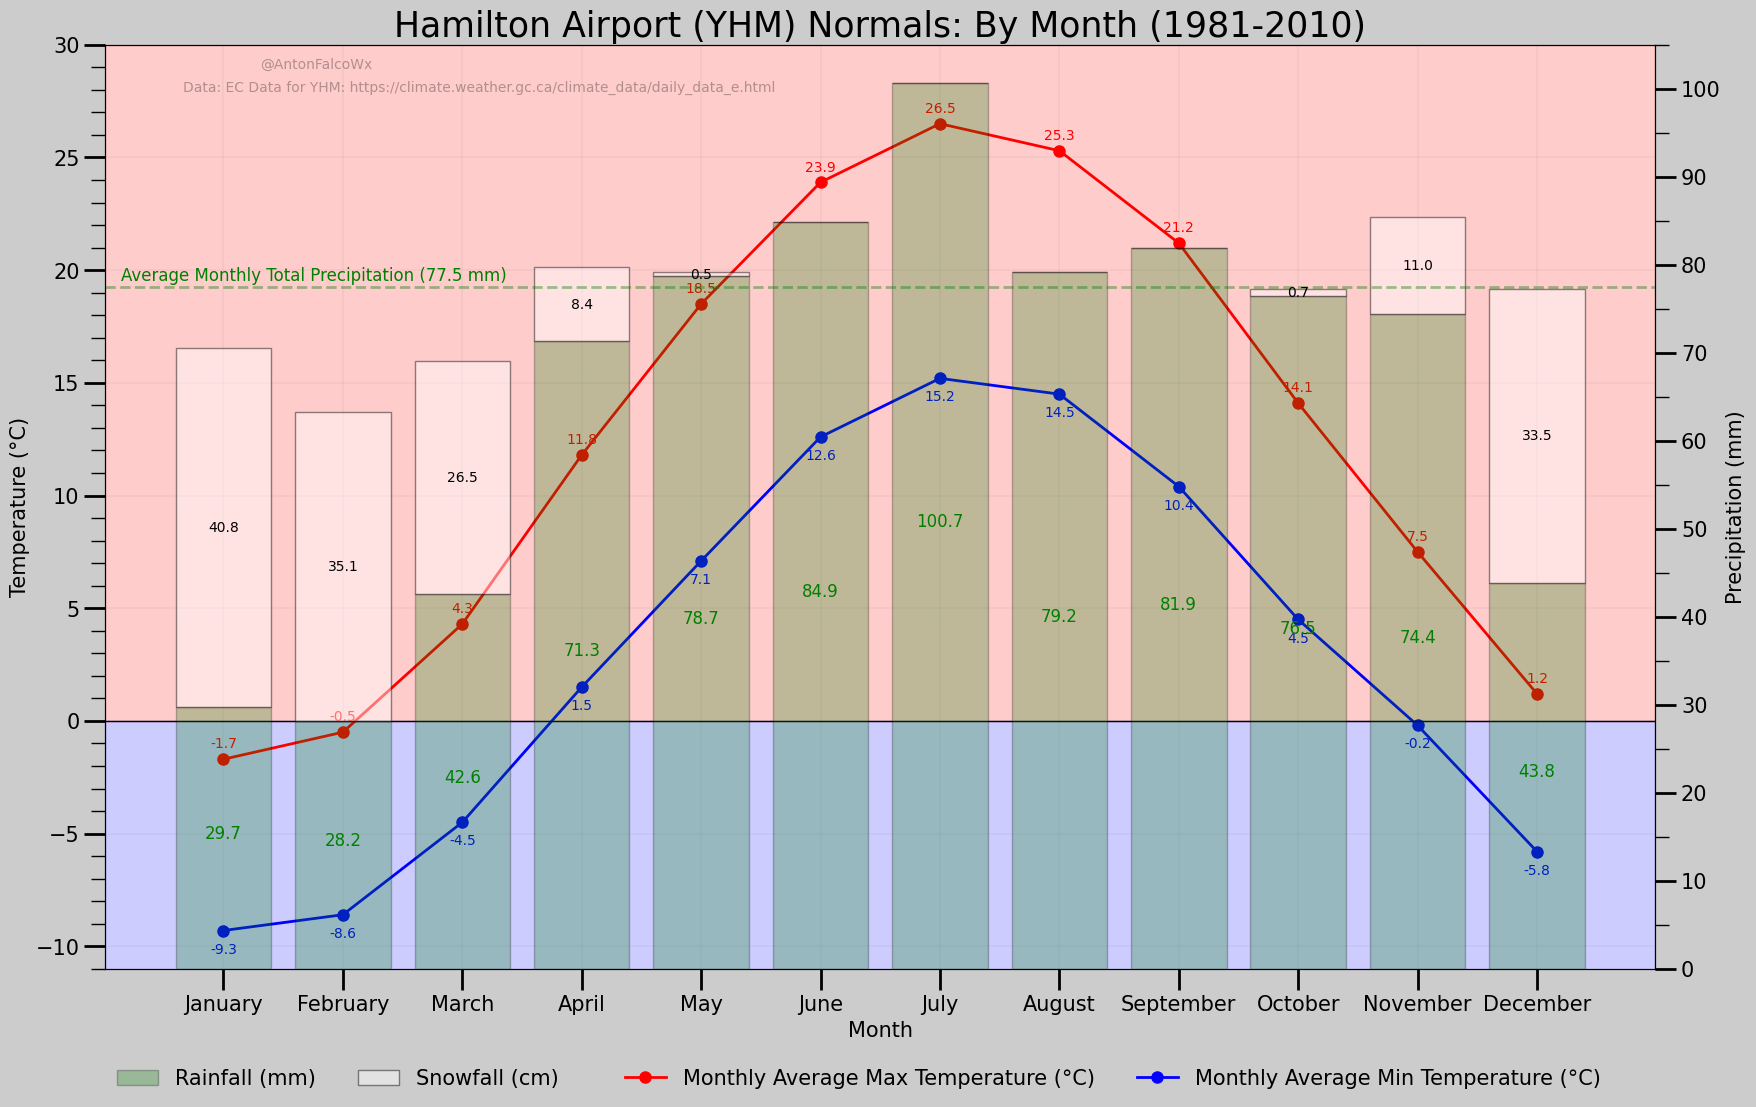

In [9]:
fig, ax = plt.subplots(figsize=(20,12))
ax2 = ax.twinx()
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')


#Line Graph and Annotations
Month = (Climatology['Month'])
Max = (Climatology['Daily Maximum Temperature'])
Min = (Climatology['Daily Minimum Temperature'])
Average = (Climatology['Daily Average Temperature'])


#Precipitation Bar
Precip = ax2.bar(Month, Climatology['Rainfall'], alpha=0.25, color='g', label='Rainfall', edgecolor='black')
plt.bar_label(Precip, padding=3, fontsize=12, label_type='center', color='g')

#Snowfall Bar (Stacked on top of Precip)
Snowfall = ax2.bar(Month, Climatology['Snowfall'], bottom=Climatology['Rainfall'], alpha=0.45, color='white', label='Snowfall', edgecolor='black')  #width=0.5,
#plt.bar_label(Snowfall, padding=3, fontsize=12, label_type='edge', fontweight='bold', color='white')

snow_labels = [f'{snow:.1f}' if snow > 0 else '' for snow in Climatology['Snowfall']]
plt.bar_label(Snowfall, labels=snow_labels, label_type='center', fontweight='bold', color='black')


#Original Overlapping Precipitation & Snow Bar and Label
#Precip = ax2.bar(Climatology['Month'], Climatology['Precipitation'], alpha=0.25, color='g', zorder=1)
#plt.bar_label(Precip, padding=3, fontsize=12, color='g', alpha=0.75)
#
#Snowfall = ax2.bar(Climatology['Month'], Climatology['Snowfall'], width=0.5, alpha=0.7, color='w', zorder=1)
#plt.bar_label(Snowfall, padding=3, fontsize=10, label_type='edge', fontweight='bold', color='white')


#Monthly Max
ax.plot(Climatology['Month'], Climatology['Daily Maximum Temperature'], '-o', ms=8, color='red', linewidth=2.0)  
for i, txt in enumerate(Max):
    ax.annotate(txt, (Month[i], Max[i]+0.5), ha='center', c='red', fontsize=10)

#Monthly Min
ax.plot(Climatology['Month'], Climatology['Daily Minimum Temperature'], '-o', ms=8, color='blue', linewidth=2.0, zorder=2)
for i, txt in enumerate(Min):
    ax.annotate(txt, (Month[i], Min[i]-1), ha='center', c='blue', fontsize=10)

#Monthly Average
#ax.plot(Climatology['Month'], Climatology['Daily Average Temperature'], '-o', ms=8, color='black', linestyle='dashed', linewidth=2.0)
#for i, txt in enumerate(Average):
#    ax.annotate(txt, (Month[i], Average[i]+0.5), ha='center', c='black', fontsize=8)



#Graph Labels
ax.set_title("Hamilton Airport (YHM) Normals: By Month (1981-2010)",fontweight='bold', fontsize=25)
ax.set_xlabel("Month",fontweight='bold', fontsize=15)
ax.set_ylabel("Temperature (°C)",fontweight='bold', fontsize=15)

#Second y-axis labels and limits
ax2.set_ylabel("Precipitation (mm)",fontweight='bold', fontsize=15)
ax2.set_ylim([0.0, 105])
ax.set_ylim([-11, 30])

#Shaded background
ax.axhspan(30, 0, alpha=0.2, color='r')
ax.axhspan(0, -13, alpha=0.2, color='b')


#Legends (need two)
ax.legend(["Monthly Average Max Temperature (°C)", "Monthly Average Min Temperature (°C)"], fontsize=15, frameon=False, loc='lower center', bbox_to_anchor=(0.65, -0.15), ncol=2)
ax2.legend(["Rainfall (mm)", "Snowfall (cm)"], fontsize=15, frameon=False, loc='lower center', bbox_to_anchor=(0.15, -0.15), ncol=2)

#Adding name(@)
plt.text(0.1, 0.975, '@AntonFalcoWx', fontsize = 10, transform=ax.transAxes, alpha=0.3)
plt.text(0.05, 0.95, 'Data: EC Data for YHM: https://climate.weather.gc.ca/climate_data/daily_data_e.html', fontsize = 10, transform=ax.transAxes, alpha=0.3)
plt.text(0.01, 0.745, 'Average Monthly Total Precipitation (77.5 mm)', fontsize = 12, color='green', transform=ax.transAxes)

#Average lines
#ax.axhline(12.5,0,28,color='red',linewidth=2.0,linestyle='dashed',alpha=0.5)
ax2.axhline(77.5,0,28,color='green',linewidth=2.0,linestyle='dashed',alpha=0.4)
ax.axhline(0,0,28,color='black',linewidth=1.0,linestyle='solid')

#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.set_major_locator(MultipleLocator())
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator(5))
ax2.yaxis.set_major_locator(MultipleLocator(10))


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)


#plt.savefig('YHM_Normals.jpg', dpi=300)
ax.grid(which='major', color='gray', linewidth=0.15, alpha=0.75)
plt.show()
plt.close()